In [ ]:
import os
import cv2
import random
import glob as gb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score

import tensorflow as tf
from tensorflow.keras import layers, models
from keras.models import load_model,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D



In [ ]:
base_dir = 'dataset/' 
train_data = 'dataset/train'
test_data = 'dataset/test'

print(f'Folders of dataset: {os.listdir(base_dir)}')
print(f'Train data set: {os.listdir(train_data)}')
print(f'Test data set: {os.listdir(test_data)}')

Folders of dataset: ['test', 'train']
Train data set: ['Closed', 'Open', 'yawn', 'no_yawn']
Test data set: ['Closed', 'Open', 'yawn', 'no_yawn']


In [4]:
for dir in os.listdir(train_data):
    full_path = os.path.join(train_data, dir)
    file = gb.glob(pathname = str(full_path + '/*.jpg'))
    print(f'lenght of files {len(file)} in {dir}')

lenght of files 617 in Closed
lenght of files 617 in Open
lenght of files 617 in yawn
lenght of files 616 in no_yawn


In [5]:
for dir in os.listdir(test_data):
    full_path = os.path.join(test_data, dir)
    file = gb.glob(pathname = str(full_path + '/*.jpg'))
    print(f'lenght of files {len(file)} in {dir}')

lenght of files 109 in Closed
lenght of files 109 in Open
lenght of files 106 in yawn
lenght of files 109 in no_yawn


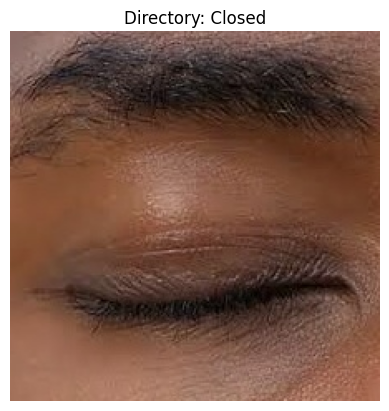

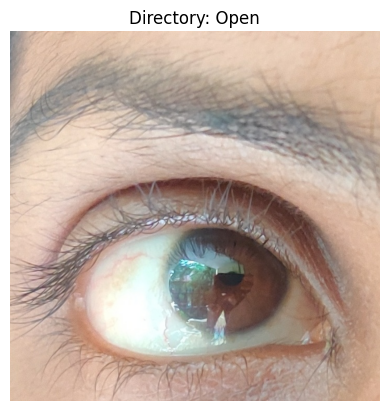

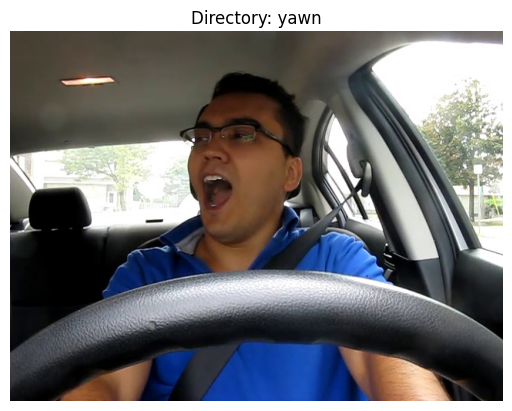

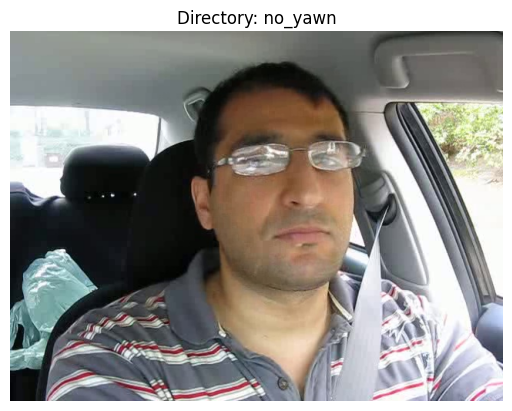

In [6]:
def show_image(train_data):
    for dir in os.listdir(train_data):  
        full_path = os.path.join(train_data, dir)
        if os.path.isdir(full_path):  
            files = os.listdir(full_path)  
            for file in files:
                if file.endswith('.jpg'): 
                    img_path = os.path.join(full_path, file)
                    image = plt.imread(img_path)  
                    plt.imshow(image) 
                    plt.title(f"Directory: {dir}")  
                    plt.axis('off')  
                    plt.show()  
                    break  
show_image(train_data)

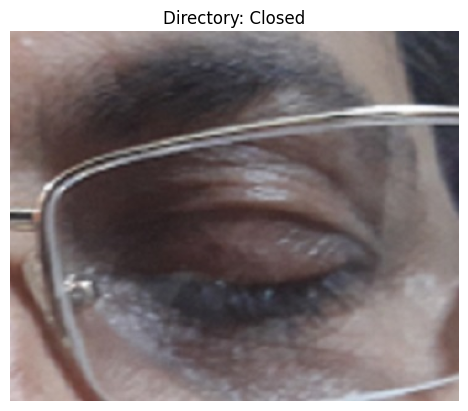

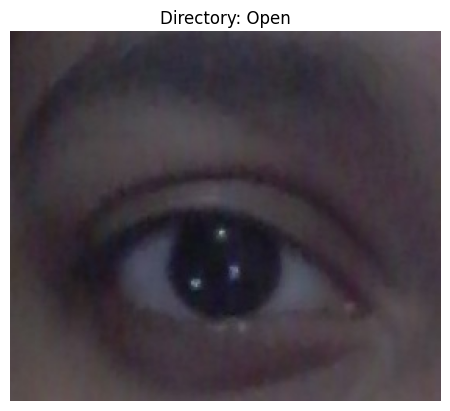

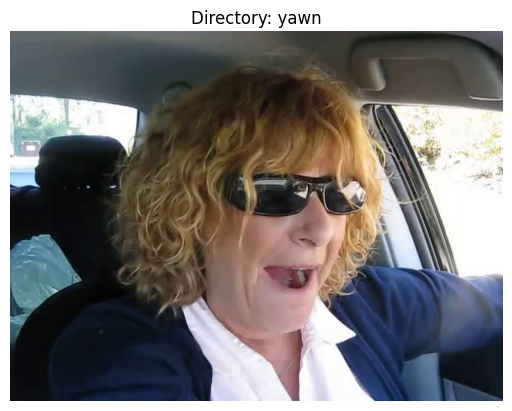

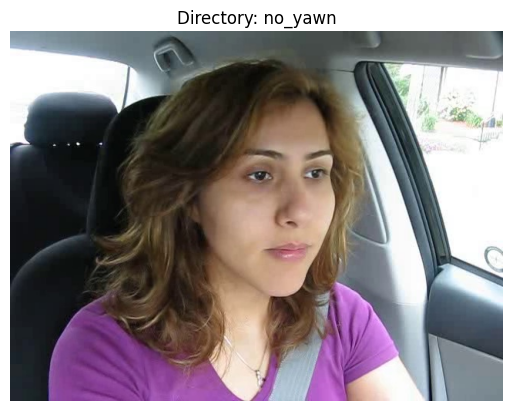

In [7]:
show_image(test_data)

In [8]:
code = {'Closed':0, 'Open':1, 'yawn':2, 'no_yawn':3}
def getCode(n):
    for x,y in code.items():
        if n==y:
            return x

In [9]:
#exploring images in train dataset
size = []
for dir in os.listdir(train_data):
    full_path = os.path.join(train_data,dir)
    files = gb.glob(pathname = str(full_path + '/*.jpg'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts  #making each image size array into entry in table

<bound method IndexOpsMixin.value_counts of 0       (223, 223, 3)
1       (109, 110, 3)
2       (300, 266, 3)
3       (232, 273, 3)
4        (91, 115, 3)
            ...      
2462    (480, 640, 3)
2463    (480, 640, 3)
2464    (480, 640, 3)
2465    (480, 640, 3)
2466    (480, 640, 3)
Length: 2467, dtype: object>

In [10]:
#resize image in train dataset with 224*224
s = 224
X_train = []
y_train = []
for dir in os.listdir(train_data):
    full_path = os.path.join(train_data,dir)
    files = gb.glob(pathname = str(full_path + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_array = cv2.resize(image, (s,s))
        X_train.append(image_array)
        y_train.append(code.get(dir))

In [11]:
print(f'lenght of train dataset: {len(X_train)}')
print(f'lenght of train label dataset: {len(y_train)}')

lenght of train dataset: 2467
lenght of train label dataset: 2467


In [12]:
s=224
X_test = []
y_test = []
for dir in os.listdir(test_data):
    full_path = os.path.join(test_data,dir)
    files = gb.glob(pathname = str(full_path + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
        image_array = cv2.resize(image, (s,s))
        X_test.append(image_array)
        y_test.append(code.get(dir))

In [13]:
print(f'lenght of test dataset: {len(X_test)}')
print(f'lenght of test label dataset: {len(y_test)}')

lenght of test dataset: 433
lenght of test label dataset: 433


In [14]:
#converting list into numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2467, 224, 224, 3)
Shape of X_test: (433, 224, 224, 3)
Shape of y_train: (2467,)
Shape of y_test: (433,)


In [15]:


normalization_layer = layers.Normalization()

normalization_layer.adapt(X_train)

X_train = normalization_layer(X_train)
X_test = normalization_layer(X_test)


In [16]:
print("Actual y_train shape:", y_train.shape)
print("Actual y_test shape:", y_test.shape)

# Convert integer labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

# Print the new shape
print("After one-hot encoding, y_train shape:", y_train.shape)  # Expected: (2467, 4)
print("After one-hot encoding, y_test shape:", y_test.shape)    # Expected: (433, 4)


Actual y_train shape: (2467,)
Actual y_test shape: (433,)
After one-hot encoding, y_train shape: (2467, 4)
After one-hot encoding, y_test shape: (433, 4)


In [17]:
print(f"unique values of y_train: {np.unique(y_train)}")
print(f"unique values of y_test: {np.unique(y_test)}")

unique values of y_train: [0. 1.]
unique values of y_test: [0. 1.]


In [18]:
# Define CNN model
Drowsiness_detection = models.Sequential([

    # Conv Layer 1
    layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=2),

    # Conv Layer 2
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Conv Layer 3
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Conv Layer 4
    layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Output Layer (4 classes with softmax)
    layers.Dense(4, activation='softmax') 
])

# Compile the model
Drowsiness_detection.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Lower learning rate
    loss='categorical_crossentropy',  #  Correct for one-hot encoding
    metrics=['accuracy']
)

# Print model summary
Drowsiness_detection.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 111, 111, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 55, 55, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 53, 53, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 2,458,788 (9.38 MB)

 Trainable params: 2,458,084 (9.38 MB)

 Non-trainable params: 704 (2.75 KB)

In [19]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1, restore_best_weights=True)

# Reduce learning rate if validation accuracy does not improve
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

# Save the best model weights
# Save the best model weights in the new `.keras` format
model_checkpoint = ModelCheckpoint(filepath='best_model.keras',  #  Change .h5 → .keras
                                   monitor='val_accuracy',
                                   save_best_only=True,
                                   save_weights_only=False,  # Change to False to save full model
                                   mode='max',
                                   verbose=1)

In [20]:
# Define augmentation only for training data
datagen = ImageDataGenerator(
    rotation_range=20,       # Rotate images by ±20 degrees
    width_shift_range=0.2,   # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    shear_range=0.2,         # Shearing transformations
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'      # Fill missing pixels
)

# Apply augmentation only to training data
train_generator = datagen.flow(X_train, y_train, batch_size=16, shuffle=True)


In [21]:
# Train the model
history = Drowsiness_detection.fit(
    train_generator,  #  Augmented training data
    epochs=30,        # Train for 30 epochs
    validation_data=(X_test, y_test),  #  No augmentation on test data
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


153/155 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.5495 - loss: 1.1777
Epoch 1: val_accuracy improved from -inf to 0.25173, saving model to best_model.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 43s 197ms/step - accuracy: 0.5501 - loss: 1.1740 - val_accuracy: 0.2517 - val_loss: 5.0991 - learning_rate: 5.0000e-04
Epoch 2/30
154/155 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.6330 - loss: 0.8019
Epoch 2: val_accuracy improved from 0.25173 to 0.25404, saving model to best_model.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 24s 147ms/step - accuracy: 0.6331 - loss: 0.8016 - val_accuracy: 0.2540 - val_loss: 4.3438 - learning_rate: 5.0000e-04
Epoch 3/30
154/155 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.6576 - loss: 0.7050
Epoch 3: val_accuracy improved from 0.25404 to 0.27945, saving model to best_model.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.6577 - loss: 0.7048 - val_accuracy: 0.2794 - val_loss: 2.4369 - learning_rate: 5.0000e-04
Epoch 4/30
154/155 ━━━━━━━━━━━━━━━━━━━━

In [22]:
Drowsiness_detection.save("drowsiness_cnn_model.h5")


In [23]:
os.listdir("./")

['best_model.keras', '__notebook__.ipynb', 'drowsiness_cnn_model.h5']

In [24]:
# Evaluate on test data
test_loss, test_acc = Drowsiness_detection.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8724 - loss: 0.2456
Test Accuracy: 0.81
Test Loss: 0.39


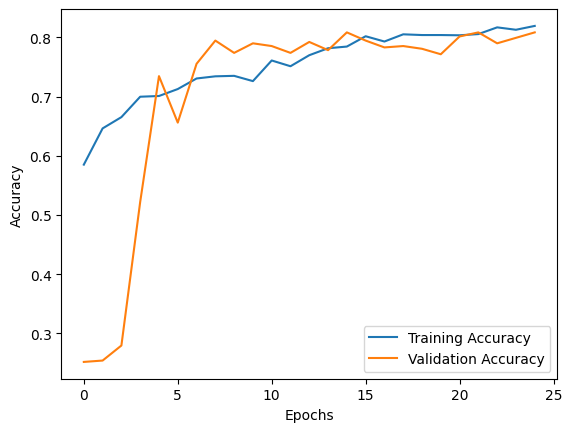

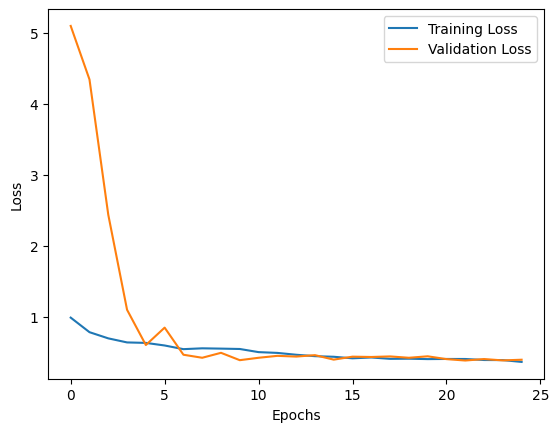

In [25]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
Indexcode = {0: 'Closed', 1: 'Open', 2: 'yawn', 3: 'no_yawn'}
def getLabel(one_hot_vector):
    class_index = int(np.argmax(one_hot_vector))  # Get the class index
    print(f"DEBUG: class_index = {class_index}")  #  Print class index for debugging
    
    print(f"DEBUG: Raw prediction vector = {one_hot_vector}")  # Print raw output

    if class_index in Indexcode:
        return Indexcode[class_index]
    else:
        return "Unknown"  # Handle unexpected cases

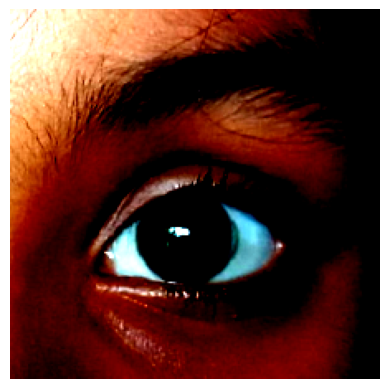

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
DEBUG: class_index = 1
DEBUG: Raw prediction vector = [[1.9455523e-03 9.9803549e-01 6.0915045e-06 1.2885315e-05]]
Predicted Class: Open
Final Output: Active


In [27]:
# Pick an image from X_test
index = 157  # Change this index to test different images
img = X_test[index]

# Display the image
plt.imshow(img)
plt.axis("off")  # Hide axes for clarity
plt.show()

# Reshape for prediction (add batch dimension)
img = np.expand_dims(img, axis=0)  # Shape becomes (1, 224, 224, 3)

# Make prediction
prediction = Drowsiness_detection.predict(img)

# Get predicted class label
predicted_label = getLabel(prediction)

# Print predicted class
print(f"Predicted Class: {predicted_label}")

# Convert to Active/Drowsy decision
if predicted_label in ["Closed", "yawn"]:  # Closed or Yawn means Drowsy
    print("Final Output: Drowsy")
elif predicted_label in ["Open", "no_yawn"]:  # Open or No Yawn means Active
    print("Final Output: Active")
else:
    print("Final Output: Unknown")  # Handle unexpected cases
